# **SP500 STOCK SCREENER**

# **Import Libraries**

In [0]:
# Working with external Google Sheets:
!pip install --upgrade -q gspread
!pip install gspread-dataframe

# install Google sheets API:
!pip install --upgrade -q gspread
!pip install gspread-dataframe
!pip install -q seaborn

# import:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')
import numpy as np

!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf
yf.pdr_override()

# import:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import seaborn as sns
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# Extract Data from a web page:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup


# **DATA - TICKERS LIST:** 

### **S&P 500 Tickers List from Wikipedia:**

In [0]:
URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
res = requests.get(URL)
soup = BeautifulSoup(res.content, 'html.parser')
tables = soup.find_all('table')
table = tables[0] # first table

# Convert to df:
df_SP500 = pd.read_html(str(table), header=0, flavor='html5lib')[0]
print(df_SP500.head(10).to_string())

  Symbol                    Security SEC filings             GICS Sector                             GICS Sub Industry     Headquarters Location Date first added      CIK      Founded
0    MMM                  3M Company     reports             Industrials                      Industrial Conglomerates       St. Paul, Minnesota       1976-08-09    66740         1902
1    ABT         Abbott Laboratories     reports             Health Care                         Health Care Equipment   North Chicago, Illinois       1964-03-31     1800         1888
2   ABBV                 AbbVie Inc.     reports             Health Care                               Pharmaceuticals   North Chicago, Illinois       2012-12-31  1551152  2013 (1888)
3   ABMD                 ABIOMED Inc     reports             Health Care                         Health Care Equipment    Danvers, Massachusetts       2018-05-31   815094         1981
4    ACN               Accenture plc     reports  Information Technology        

#### **-Or- Import Ticker List:**

In [0]:
# # Authenticate Google Drive Account for importing a list of tickers from CSV file (unused at the moment):
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
# # read Tickers List from Google Sheets:
# tickers = gc.open_by_url('https://docs.google.com/spreadsheets/d/1TK4DbyciQhB1ZhYMcCfNaU_-k3BQzCK6MJMHF45zc4U/edit#gid=0')
# ws = tickers.worksheet('test')
# df_tickers = get_as_dataframe(ws)

In [0]:
# df_tickers.tail()

In [0]:
# Create Moving Average List of Screened Stocks: 
MA_List= pd.DataFrame(columns=['Stock', 'Close', '50 Day MA','200 Day MA','200 Day Up'])

# **1. *SCREENER - UPTREND:*** 
### **Stocks w/ Current Price > 50 Day & 200 Day Moving Averages:**

In [0]:
# Loops through all tickers & collect stock price data from Yahoo:
for i in df_SP500.index:
  stock = str(df_SP500['Symbol'][i])
  
  # Start period:
  year = 2018
  month = 1
  day = 1

  start = dt.datetime(year, month, day)
  now = dt.datetime.now()

  try:
    df = pdr.get_data_yahoo(stock, start, now)
    smaUsed=[50,200]
    for x in smaUsed:
      sma=x
      df["SMA_"+str(sma)]=round(df.iloc[:,4].rolling(window=sma).mean(),2)
      
    currentClose=df["Adj Close"][-1]
    moving_average_50=df["SMA_50"][-1]
    moving_average_200=df["SMA_200"][-1]
    moving_average_200_20 = df["SMA_200"][-20]

		#Condition 1: Current Price > 50 SMA:
    if(currentClose > moving_average_50):
      cond_1=True
    else:
      cond_1=False
		#Condition 2: Current Price > 200 SMA
    if(currentClose > moving_average_200):
      cond_2=True
    else:
      cond_2=False
		#Condition 3: 200 SMA up trending for at least 1 month:
    if(moving_average_200>moving_average_200_20):
      cond_3=True
    else:
      cond_3=False

      
    if(cond_1 and cond_2 and cond_3):
      MA_List = MA_List.append({'Stock': stock,"Close": currentClose,"50 Day MA": moving_average_50,"200 Day MA": moving_average_200,'200 Day Up': moving_average_200_20 
                                      }, ignore_index=True)
    
  except Exception:
    print("No data on "+stock)


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

## ***UPTREND LIST:***

In [0]:
# Print stocks which pass screening conditions:
MA_List

In [0]:
# Export as CSV:
from google.colab import drive
drive.mount('/content/drive/')

from google.colab import files  
MA_List.to_csv('./MA_List.csv') 
files.download('./MA_List.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Daily Alert Email - to our eamils:
# import smtplib

# server = smtplib.SMTP('smtp.gmail.com', 587)
# server.starttls()
# server.login("sender_gmail_here@gmail.com", "your_password_here")

# msg = "DAILY UPTREND SCREENER"
# server.sendmail("sender_gmail_here@gmail.com", "receiver_gmail_here@gmail.com", msg)
# server.quit()



### ***UPTREND CHART:***

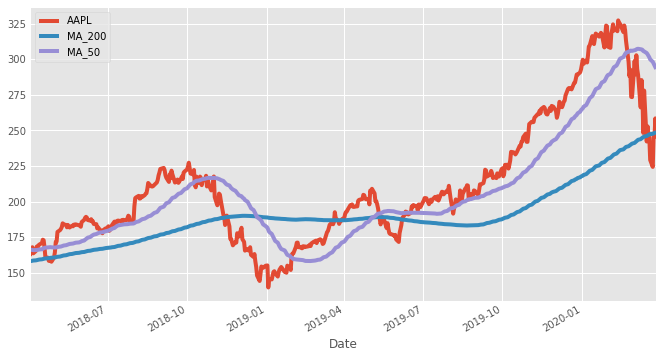

In [0]:
# Stock Chart:

tickers = ['AAPL']

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = web.DataReader(ticker, data_source='yahoo', start='2017-04-01')['Adj Close']

# rolling averages
MA_200 = ['MA_200']
df[MA_200] = df[tickers].rolling(window=200).mean()
MA_50 = ['MA_50']
df[MA_50] = df[tickers].rolling(window=50).mean()

# 1-year Chart:
df = df.loc[(df.index >= ('2018-04-01')), ]
df.plot(figsize=(10,6), grid=True)

# **2. *SCREENER - BOUNCE/CRISIS:***

In [0]:
# install packages:
# !pip install requests
# !pip install beautifulsoup4
# Import the modules:
import numpy as np
import pandas as pd
import requests
import bs4
import lxml.etree as xml

### **CNN Investor Sentiment Score:**

In [0]:
def get_today_fear_index():
  # Sentiment Screener - Look for a Market Bounce when Sentiment is below 20:
  URL = "https://money.cnn.com/data/fear-and-greed/"
  res = requests.get(URL)
  soup = bs4.BeautifulSoup(res.content, 'html.parser')

  # Find Data Section of Interest:
  Greed_Now = soup.find('div', attrs = {'class': 'modContent feargreed'})

  greeds = Greed_Now.find_all('li')

  greed_dict = {
      'Present Value' : '',
      'Previous Day' : '',
      '1W' : '',
      '1M' : '',
      '1Y' : ''
  }

  for idx, k in enumerate(greed_dict.keys()):
    text = greeds[idx].text
    val = re.search(r"(?<=\:)(.*?)(?=\()", text)
    greed_dict[k] = int(val.group())

  return pd.DataFrame(greed_dict, index=[datetime.now()])


In [0]:
get_today_fear_index()

,Present Value,Previous Day,1W,1M,1Y
2020-03-28 10:59:16.791539,23,22,8,21,48


### **Single Stock BOUNCE SCREENER** 
#### (trying to use this code below to loop through the SP500) 

In [0]:
# Stock Charts: 
tickers = ['AAPL']

In [0]:
df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = web.DataReader(ticker, data_source='yahoo', start='2017-04-01')['Adj Close']

In [0]:
# rolling averages:

MA_200 = ['MA_200']
df[MA_200] = df[tickers].rolling(window=200).mean()

MA_50 = ['MA_50']
df[MA_50] = df[tickers].rolling(window=50).mean()


In [0]:
# RSI CODE:

df = df.reset_index()

n = 14 # number of days

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.append(y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1))

df['change'] = df[tickers].diff()
df['gain'] = df.change.mask(df.change < 0, 0.0)
df['loss'] = -df.change.mask(df.change > 0, -0.0)

df.loc[n:,'avg_gain'] = rma(df.gain[n+1:].values, n, df.loc[:n, 'gain'].mean())
df.loc[n:,'avg_loss'] = rma(df.loss[n+1:].values, n, df.loc[:n, 'loss'].mean())

# # Alternatively
# df['avg_gain'][n] = df.loc[:n, 'gain'].mean()
# df['avg_loss'][n] = df.loc[:n, 'loss'].mean()

df['rs'] = df.avg_gain / df.avg_loss
df['rsi_14'] = 100 - (100 / (1 + df.rs))


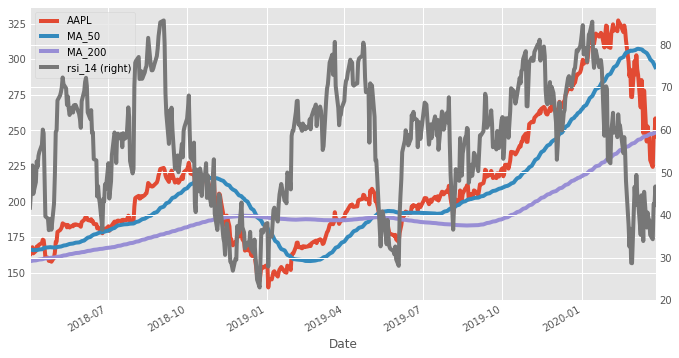

In [0]:
# Stock Chart:

df = df.set_index('Date')

df.loc['2018-04-01':,[ticker,'MA_50','MA_200','rsi_14']].plot(secondary_y=['rsi_14'], mark_right=True, figsize = (10,6), grid=True)


### **Multi Stock BOUNCE SCREENER** 
#### (not working - trying to use this code in a loop through the SP500) 

In [0]:
# Loops through all tickers & calc the RSI oversold indicator - Currently Not working:
for i in df_SP500.index:
  stock = str(df_SP500['Symbol'][i])
  
  # Start period:
  year = 2019
  month = 1
  day = 1

  start = dt.datetime(year, month, day)
  now = dt.datetime.now()

  try:
    df = pdr.get_data_yahoo(stock, start, now)
    
    # RSI Calc:
    # df = df.reset_index()
    n = 14
    
    def rma(x, n, y0):
      a = (n-1) / n
      ak = a**np.arange(len(x)-1, -1, -1)
      return np.append(y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1))
    df['change'] = df[stock].diff()
    df['gain'] = df.change.mask(df.change < 0, 0.0)
    df['loss'] = -df.change.mask(df.change > 0, -0.0)
    
    df.loc[n:,'avg_gain'] = rma(df.gain[n+1:].values, n, df.loc[:n, 'gain'].mean())
    df.loc[n:,'avg_loss'] = rma(df.loss[n+1:].values, n, df.loc[:n, 'loss'].mean())
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi_14'] = 100 - (100 / (1 + df.rs))
  
    currentClose=df["Adj Close"][-1]
    RSI=df['rsi_14'][-1]
    

		#Condition 1: RSI < 30:
    if(RSI < 30):
      cond_1=True
    else:
      cond_1=False


    if(cond_1):
      RSI_List = RSI_List.append({'Stock': stock,"Close": currentClose,"RSI": RSI}, ignore_index=True)
    
  except Exception:
    print("No data on "+stock)

[*********************100%***********************]  1 of 1 downloaded
No data on MMM
[*********************100%***********************]  1 of 1 downloaded
No data on ABT
[*********************100%***********************]  1 of 1 downloaded
No data on ABBV
[*********************100%***********************]  1 of 1 downloaded
No data on ABMD
[*********************100%***********************]  1 of 1 downloaded
No data on ACN
[*********************100%***********************]  1 of 1 downloaded
No data on ATVI
[*********************100%***********************]  1 of 1 downloaded
No data on ADBE
[*********************100%***********************]  1 of 1 downloaded
No data on AMD
[*********************100%***********************]  1 of 1 downloaded
No data on AAP
[*********************100%***********************]  1 of 1 downloaded
No data on AES
[*********************100%***********************]  1 of 1 downloaded
No data on AFL
[*********************100%***********************]  1 of 1 do

## ***BOUNCE LIST - Raw:***
#### **not working**

In [0]:
# Print stocks which pass screening conditions:
RSI_List

NameError: ignored

### ***SCREENER 2 - FUNDAMENTALS:***

In [0]:
# Screen out stocks with High Debt & Low Margins:
# stock = 
URL = "https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL"
res = requests.get(URL)
soup = BeautifulSoup(res.content, 'html.parser')
tables = soup.find_all('table')
table = tables[0] # first table

# Convert to df:
Yahoo = pd.read_html(str(table), header=0, flavor='html5lib')[0]
print(Yahoo.head(10).to_string())

ERROR! Session/line number was not unique in database. History logging moved to new session 60
       Market Cap (intraday) 5  1.08T
0           Enterprise Value 3  1.14T
1                 Trailing P/E  19.67
2                Forward P/E 1  16.21
3  PEG Ratio (5 yr expected) 1   1.68
4            Price/Sales (ttm)   4.05
5             Price/Book (mrq)  12.13
6   Enterprise Value/Revenue 3   4.26
7    Enterprise Value/EBITDA 6  14.60


In [0]:
# Screen out Debt/Equity > ~1.0x ((EV - MC) / MC):



In [0]:
# Screen out EBITDA Mgn below ~20%: 



## ***BOUNCE LIST - SCREENED:***

In [0]:
# Email BOUNCE LIST when Sentiment Score is Below 20:

